<a href="https://colab.research.google.com/github/mogollonalex/Investigacion-De-Operaciones/blob/main/InvestigacionDeOperaciones_MetodoGrafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Problema programación lineal simple mediante el uso del metodo gráfico


\begin{align}
\ \ \ \ \text{Minimizar} &  \ \ \ \ \ \ \ \ \  \ \ (Z)= 60x_1 + 40x_3 &&(1)\\
\text{s. t. } & 4x_1 + 4x_2 \ge 10     &&(2)\\
        & 2x_1 + \ \ x_2 \ge 4         &&(3)\\
        & 6x_1 + 2x_2 \le 12 &&(4)\\
        & x_1 \geq 0  &&(5)\\
        & x_2 \geq 0  &&(6)\\
\end{align}



In [1]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 2.5 MB/s 


In [2]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create an object of a model
prob = LpProblem("Simple LP Problem", LpMinimize)

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [4]:
# Define the decision variables
x1 = LpVariable("x1", 0)
x2 = LpVariable("x2", 0)

In [5]:
# Define the objective function
prob += 60*x1 + 40*x2

In [6]:
# Define the constraints
prob += 4*x1 + 4*x2 >= 10.0, "1st constraint"
prob += 2*x1 + x2 >= 4.0, "2nd constraint"
prob += 6*x1 + 2*x2 <= 12.0, "3rd constraint"

In [7]:
# Solve the linear programming problem
prob.solve()

1

In [8]:
# Print the results
print ("Status: ", LpStatus[prob.status])

Status:  Optimal


In [9]:
for v in prob.variables():
    print (v.name, "=", v.varValue)

x1 = 1.5
x2 = 1.0


In [10]:

print ("The optimal value of the objective function is = ", value(prob.objective))

The optimal value of the objective function is =  130.0


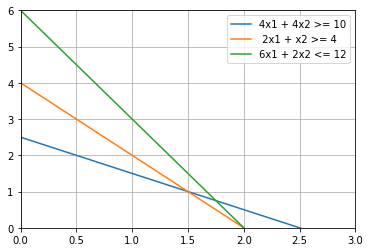

In [11]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10')
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4')
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12')

plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

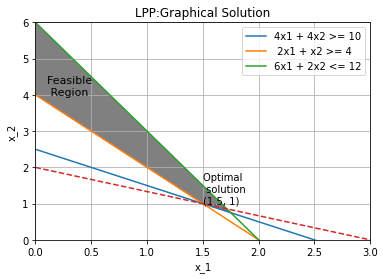

In [12]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10')
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4')
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12')
plt.plot(x, 2 - 2/3*x, '--')

# Define the boundaries of the feasible area in the plot
x = [0, 1.5, 1.75, 0]
y = [4, 1, 0.75, 6]
plt.fill(x, y, 'grey')

plt.text(0.1, 4, 'Feasible \n Region', size = '11')
plt.annotate('Optimal \n solution\n(1.5, 1)', xy = (1.5, 1.0))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title('LPP:Graphical Solution')
plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()